# Python 稀疏矩阵

## 1. coo
坐标格式 coo_matrix

coo_matrix可以通过四种方式实例化，除了可以通过coo_matrix(D), D代表密集矩阵；

coo_matrix(S), S代表其他类型稀疏矩阵或者coo_matrix((M, N), [dtype])构建一个shape为M*N的空矩阵，默认数据类型是d，还可以通过(row, col, data)三元组初始化：


In [12]:
import numpy as np
from scipy.sparse import coo_matrix
from matplotlib import pyplot as plt

In [4]:
_row  = np.array([0, 3, 1, 0])
_col  = np.array([0, 3, 1, 2])
_data = np.array([4, 5, 7, 9])
A = coo_matrix((_data, (_row,_col)), shape = (4, 4), dtype =np.int)

In [7]:
A.toarray()

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

In [6]:
A.todense()

matrix([[4, 0, 9, 0],
        [0, 7, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 5]])

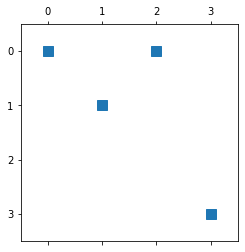

In [13]:
plt.spy(A)

coo_matrix对象有以下属性：

dtype dtype 矩阵中元素的数据类型 

shape 2-tuple 获取矩阵的shape 

ndim int 获取矩阵的维度，当然值是2咯 

nnz 存储值的个数，包括显示声明的零元素 

data 稀疏矩阵存储的值，是一个一维数组，即上面例子中的_data 

row 与data同等长度的一维数组，表征data中每个元素的行号 

col 与data同等长度的一维数组，表征data中每个元素的列号 

### COO不能直接进行算数运算， 要转成CSR/CSC啥的
COO有利于稀疏格式之间的快速转换（tobsr()、tocsr()、to_csc()、to_dia()、to_dok()、to_lil()）

允许又重复项（格式转换的时候自动相加）

能与CSR / CSC格式的快速转换

## csr
按行压缩

由三个一维数组indptr, indices, data组成。这种格式要求矩阵元「按行顺序存储」，「每一行中的元素可以乱序存储」。那么对于每一行就只需要用一个指针表示该行元素的起始位置即可。indptr存储每一行数据元素的起始位置，indices这是存储每行中数据的列号，与data中的元素一一对应。


In [14]:
from scipy.sparse import csr_matrix
indptr = np.array([0,2,3,6])
indices = np.array([0,2,2,0,1,2])
data = np.array([1,2,3,4,5,6])
B = csr_matrix((data,indices,indptr),shape=(3,3))
B.toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]])

In [24]:
B.indices, B.indptr, B.data, B.nnz

(array([0, 2, 2, 0, 1, 2]), array([0, 2, 3, 6]), array([1, 2, 3, 4, 5, 6]), 6)

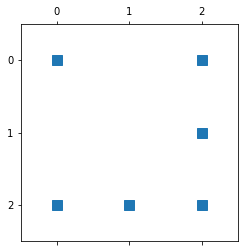

In [19]:
plt.spy(B)

## csc
csc_matrix和csr_matrix正好相反，即按列压缩的稀疏矩阵存储方式，同样由三个一维数组indptr, indices, data组成

In [20]:
from scipy.sparse import csc_matrix
_indptr = np.array([0,2,3,6])
_indices = np.array([0,2,2,0,1,2])
_data = np.array([1,2,3,4,5,6])
C = csc_matrix((_data, _indices, _indptr), shape = (3,3))

In [21]:
C.toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]])

In [23]:
C.shape, C.dtype, C.ndim, C.nnz

((3, 3), dtype('int32'), 2, 6)

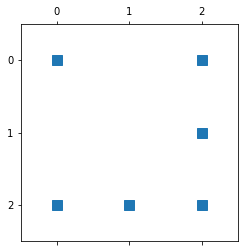

In [25]:
plt.spy(C)

## lil
lil_matrix，即List of Lists format，又称为Row-based linked list sparse matrix。它使用两个嵌套列表存储稀疏矩阵：

data保存每行中的非零元素的值，rows保存每行非零元素所在的列号(列号是顺序排序的)。

这种格式「很适合逐个添加元素，并且能快速获取行相关的数据」。

In [26]:
from scipy.sparse import lil_matrix
data=[[8,0,1,0,-1],
     [0,8,2,0,0],
     [0,0,0,0,3],
     [1,-2,0,0,8],
      [0,0,-2,0,0]]
D = lil_matrix(data)

In [27]:
D.rows

array([list([0, 2, 4]), list([1, 2]), list([4]), list([0, 1, 4]),
       list([2])], dtype=object)

In [28]:
D.data

array([list([8, 1, -1]), list([8, 2]), list([3]), list([1, -2, 8]),
       list([-2])], dtype=object)

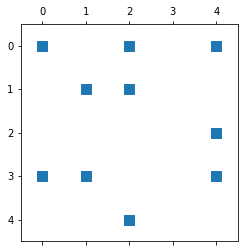

In [29]:
plt.spy(D)

## dia
dia_matrix，全称Sparse matrix with DIAgonal storage，是一种对角线的存储方式。将稀疏矩阵使用offsets和data两个矩阵来表示。offsets表示data中每一行数据在原始稀疏矩阵中的对角线位置k

k>0, 对角线往右上角移动；

k<0, 对角线往左下方移动；

k=0，主对角线）。

该格式的稀疏矩阵可用于算术运算：它们支持加法，减法，乘法，除法和矩阵幂。


In [37]:
from scipy.sparse import dia_matrix
data = np.arange(1,13).reshape(3,-1)
offset = [-1,0,1]
E = dia_matrix((data, offset),shape = (5,5))
E

<5x5 sparse matrix of type '<class 'numpy.int32'>'
	with 13 stored elements (3 diagonals) in DIAgonal format>

In [38]:
E.offsets

array([-1,  0,  1], dtype=int32)

In [39]:
E.data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [40]:
E.toarray()

array([[ 5, 10,  0,  0,  0],
       [ 1,  6, 11,  0,  0],
       [ 0,  2,  7, 12,  0],
       [ 0,  0,  3,  8,  0],
       [ 0,  0,  0,  4,  0]])

In [ ]:
plt.spy(E)

## 常用函数

In [45]:
import scipy.sparse as sp

eyes生成稀疏对角单位阵

diags构建稀疏对角阵 

spdiags构建稀疏对角阵

In [46]:
N = 5
A = sp.eye(N, k=1) -2* sp.eye(N) + sp.eye(N, k=-1)
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [50]:
K = sp.diags([-2,1,5],[-1,0,1],shape=(5,5),format='csc')
K.toarray()

array([[ 1.,  5.,  0.,  0.,  0.],
       [-2.,  1.,  5.,  0.,  0.],
       [ 0., -2.,  1.,  5.,  0.],
       [ 0.,  0., -2.,  1.,  5.],
       [ 0.,  0.,  0., -2.,  1.]])

### 如果对角线上值都不一样，用spdiags，因为其参数是数组

In [51]:
data = np.vstack([np.repeat(1,N),np.repeat(-2,N),np.repeat(1,N)])
j  = sp.spdiags(data,[-1,0,1],N,N)
j.toarray()

array([[-2,  1,  0,  0,  0],
       [ 1, -2,  1,  0,  0],
       [ 0,  1, -2,  1,  0],
       [ 0,  0,  1, -2,  1],
       [ 0,  0,  0,  1, -2]])